# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [19]:
print(lat_lngs)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [27]:
# API CALL INFO 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# QUERY STRING
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# LISTS TO HOLD API RESPONSES
city_name = []
country = []
lat = []
lng = []
date = []
weather_params = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

# LOOP TO CALL THE API FOR EACH CITY

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        date.append(response["dt"])
        weather_params.append(response["weather"][0]["main"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"City Number: {city_count} | {city.capitalize()}") 
        
        city_count += 1
        
    except:
        print(f"City not found. Omitted.")
        continue

print("-------------------------")
print(f"{city_count} cities returned")


City Number: 980 | Bluff
City not found. Omitted.
City Number: 981 | Butaritari
City Number: 982 | Jamestown
City Number: 983 | Nouadhibou
City Number: 984 | Khatanga
City not found. Omitted.
City Number: 985 | Port elizabeth
City not found. Omitted.
City Number: 986 | Cape town
City Number: 987 | Kaitangata
City Number: 988 | Atuona
City Number: 989 | Kahului
City Number: 990 | Kungurtug
City Number: 991 | Bethel
City Number: 992 | Bredasdorp
City Number: 993 | Mataura
City Number: 994 | Busselton
City Number: 995 | Banda aceh
City Number: 996 | Dunedin
City Number: 997 | Saint-philippe
City Number: 998 | Tabou
City Number: 999 | East london
City Number: 1000 | Uhlove
City Number: 1001 | Rikitea
City not found. Omitted.
City Number: 1002 | Lagos
City Number: 1003 | Punta alta
City Number: 1004 | Provideniya
City Number: 1005 | Ushuaia
City Number: 1006 | Barrow
City Number: 1007 | Hobart
City Number: 1008 | Sur
City Number: 1009 | Takoradi
City Number: 1010 | Punta arenas
City Number:

City Number: 1232 | Srednekolymsk
City Number: 1233 | Ipixuna
City Number: 1234 | Rawson
City Number: 1235 | Ahipara
City Number: 1236 | Isangel
City Number: 1237 | Bathsheba
City Number: 1238 | Port hedland
City Number: 1239 | La ronge
City Number: 1240 | Palau
City Number: 1241 | Vurnary
City Number: 1242 | Hamilton
City Number: 1243 | Nanortalik
City Number: 1244 | Nome
City Number: 1245 | Iranshahr
City Number: 1246 | Doha
City Number: 1247 | Kenai
City Number: 1248 | Hirara
City Number: 1249 | George town
City not found. Omitted.
City Number: 1250 | Coihaique
City Number: 1251 | Kalmunai
City Number: 1252 | Salalah
City Number: 1253 | Liwale
City Number: 1254 | Pevek
City Number: 1255 | Hasaki
City Number: 1256 | Korla
City Number: 1257 | Borogontsy
City Number: 1258 | Tautira
City Number: 1259 | Sim
City Number: 1260 | Omboue
City Number: 1261 | Qaanaaq
City Number: 1262 | Aklavik
City Number: 1263 | Den helder
City Number: 1264 | Toora-khem
City Number: 1265 | Owando
City Number

City Number: 1496 | Mina
City Number: 1497 | Longfeng
City Number: 1498 | Benjamin aceval
City Number: 1499 | Banamba
City Number: 1500 | Kerrobert
City Number: 1501 | Bismarck
City Number: 1502 | Zhezkazgan
City not found. Omitted.
City Number: 1503 | Constitucion
City Number: 1504 | Salta
City Number: 1505 | Khasan
City Number: 1506 | Tres passos
City Number: 1507 | Ichnya
City Number: 1508 | Tecolutla
City not found. Omitted.
City Number: 1509 | Yinchuan
City Number: 1510 | Dehloran
City Number: 1511 | Jiaozuo
City Number: 1512 | Sola
City not found. Omitted.
City Number: 1513 | Vargem grande
City Number: 1514 | Novoseleznevo
City Number: 1515 | Baneh
City not found. Omitted.
City Number: 1516 | Rognan
City Number: 1517 | Shingu
City Number: 1518 | Ixtapa
City Number: 1519 | Dukat
City Number: 1520 | Resistencia
-------------------------
1521 cities returned


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# CREATE DATAFRAME
weather_data = pd.DataFrame({"City": city_name, 
                             "Country" : country,
                             "Latitude" : lat, 
                             "Longitude" : lng, 
                             "Date" : date, 
                             "Description" : weather_params,
                             "Cloudiness (%)" : cloudiness, 
                             "Humidity (%)" : humidity, 
                             "Max Temp (F)" : max_temp, 
                             "Wind Speed (mph)" : wind_speed})
weather_data.head()

,City,Country,Latitude,Longitude,Date,Description,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Bluff,NZ,-46.6000,168.3333,1652635695,Clouds,16,86,37.80,7.54
1,Butaritari,KI,3.0707,172.7902,1652635734,Rain,3,77,80.55,8.43
2,Jamestown,US,42.0970,-79.2353,1652635735,Clouds,75,64,76.95,8.05
3,Nouadhibou,MR,20.9310,-17.0347,1652635735,Sand,100,54,80.58,18.41
4,Khatanga,RU,71.9667,102.5000,1652635736,Clouds,100,94,31.80,5.82


In [38]:
# SAVE DATAFRAME TO CSV
weather_datacsv = weather_data.to_csv("../weather_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              541 non-null    object 
 1   Country           541 non-null    object 
 2   Latitude          541 non-null    float64
 3   Longitude         541 non-null    float64
 4   Date              541 non-null    int64  
 5   Description       541 non-null    object 
 6   Cloudiness (%)    541 non-null    int64  
 7   Humidity (%)      541 non-null    int64  
 8   Max Temp (F)      541 non-null    float64
 9   Wind Speed (mph)  541 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 42.4+ KB


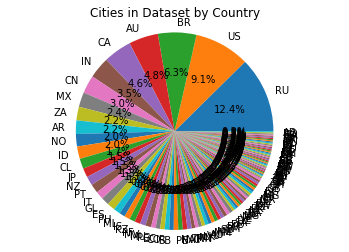

In [54]:
# COUNT ITEMS IN WEATHER DATA TO VERIFY THE SET IS > 500
# OUTPUT: 541
weather_data.info()

# GROUPBY TO SEE IF DATASET IS CONCENTRATED IN CERTAIN COUNTRIES
country_grp = weather_data.groupby("Country")["City"].count().reset_index(name="count").sort_values(["count"], ascending = False)
country_grp.head(20)

plt.pie(country_grp["count"], labels = country_grp["Country"], autopct="%1.1f%%")
plt.title("Cities in Dataset by Country")
plt.axis("equal")
plt.show()

# NOTE: RUSSIA, THE US, AND BRAZIL HAVE THE LARGEST NUMBER OF CITIES IN THE DATASET. 

In [55]:
# DESCRIBE THE WEATHER_DATA SET

weather_data.describe()

,Latitude,Longitude,Date,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
count,541.000000,541.000000,5.410000e+02,541.000000,541.000000,541.000000,541.000000
mean,19.885436,18.076006,1.652636e+09,56.763401,68.329020,65.226876,8.267985
std,34.115987,91.490447,1.394319e+02,38.231404,23.084123,18.505594,5.226998
min,-54.800000,-179.166700,1.652635e+09,0.000000,1.000000,0.930000,0.000000
25%,-8.926600,-58.616700,1.652636e+09,20.000000,54.000000,51.780000,4.470000
50%,24.412500,21.548200,1.652636e+09,68.000000,74.000000,68.160000,7.000000
75%,48.005600,96.166700,1.652636e+09,97.000000,86.000000,79.740000,11.390000
max,78.218600,179.316700,1.652636e+09,100.000000,100.000000,108.180000,27.630000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [61]:
# COUNT CITIES WITH > 100% HUMIDITY
max_humid_cities = weather_data[weather_data["Humidity (%)"] > 100]
print(f"{len(max_humid_cities)} cities in the dataset have more than 100% humidity.")


0 cities in the dataset have more than 100% humidity.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

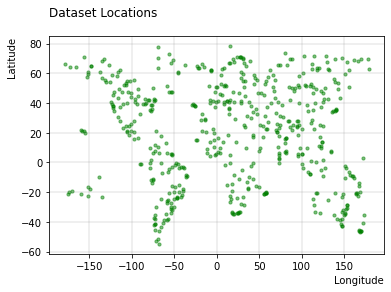

In [236]:
# SCATTER PLOT TO MIMIC CITY LOCATIONS ON A MAP
plt.scatter(weather_data["Longitude"], weather_data["Latitude"], marker = "o", \
            facecolors = "green", edgecolors = "green", s = 10, alpha = 0.5)

plt.savefig("Images/Dataset_Locations.png")
plt.title("Dataset Locations", loc = "left", pad = 20)
plt.xlabel("Longitude", loc = "right")
plt.ylabel("Latitude", loc = "top")
plt.grid(color = "grey", linewidth = 0.25)

plt.show()



## Latitude vs. Temperature Plot

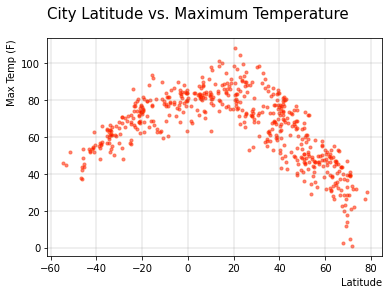

The maximum temperature and the city latitude have a correlation coeffient of: -0.41
This is a weaker relationship than expected, and may be the result of more northern latitude cities in the dataset than southern cities.


In [237]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp (F)"], marker = "o", \
            facecolors = "red", edgecolors = "orangered", s = 10, alpha = 0.5)
plt.savefig("Images/Latitude_MaxTemp.png")
plt.title("City Latitude vs. Maximum Temperature", loc = "left", pad = 20, size = 15)
plt.xlabel("Latitude", loc = "right")
plt.ylabel("Max Temp (F)", loc = "top")
plt.grid(color = "grey", linewidth = 0.25)
plt.show()

lat_temp_corr = weather_data["Latitude"].corr(weather_data["Max Temp (F)"]).round(2)
print(f"The maximum temperature and the city latitude have a correlation coeffient of: {lat_temp_corr}")
print("This is a weaker relationship than expected, and may be the result of more northern latitude cities in the dataset than southern cities.")

## Latitude vs. Humidity Plot

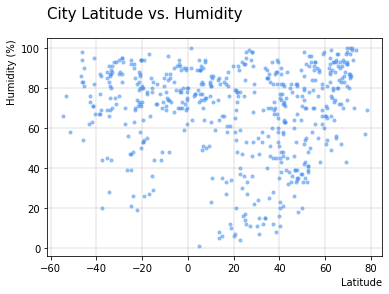

The maximum temperature and the city latitude have a correlation coeffient of: -0.04
There does not appear to be a strong relationship between latitude and humidity.


In [238]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker = "o", \
            facecolors = "dodgerblue", edgecolors = "cornflowerblue", s = 10, alpha = 0.5)

plt.savefig("Images/Latitude_Humidity.png")
plt.title("City Latitude vs. Humidity", loc = "left", pad = 20, size = 15)
plt.xlabel("Latitude", loc = "right")
plt.ylabel("Humidity (%)", loc = "top")
plt.grid(color = "grey", linewidth = 0.25)
plt.show()

lat_humi_corr = weather_data["Latitude"].corr(weather_data["Humidity (%)"]).round(2)
print(f"The maximum temperature and the city latitude have a correlation coeffient of: {lat_humi_corr}")
print("There does not appear to be a strong relationship between latitude and humidity.")

## Latitude vs. Cloudiness Plot

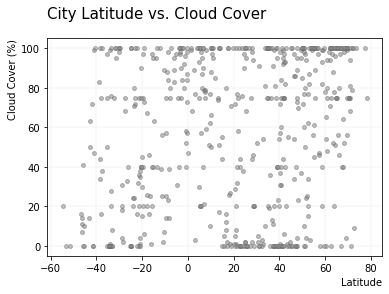

The maximum temperature and the city latitude have a correlation coeffient of: 0.2
This is a somewhat higher correlation than expected (no correlation expected), but it is weak, positive relationship.


In [239]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker = "o", \
            facecolors = "grey", edgecolors = "dimgray", s = 15, alpha = 0.5)

plt.savefig("Images/Latitude_Clouds.png")
plt.title("City Latitude vs. Cloud Cover", loc = "left", pad = 20, size = 15)
plt.xlabel("Latitude", loc = "right")
plt.ylabel("Cloud Cover (%)", loc = "top")
plt.grid(color = "lightgrey", linewidth = 0.25)
plt.show()

lat_cloud_corr = weather_data["Latitude"].corr(weather_data["Cloudiness (%)"]).round(2)
print(f"The maximum temperature and the city latitude have a correlation coeffient of: {lat_cloud_corr}")
print("This is a somewhat higher correlation than expected (no correlation expected), but it is weak, positive relationship.")

## Latitude vs. Wind Speed Plot

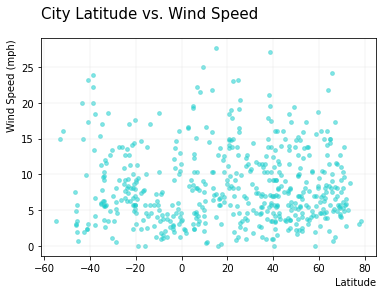

The maximum temperature and the city latitude have a correlation coeffient of: 0.0
There is no apparent relationship between wind speed and latitude.


In [240]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker = "o", \
            facecolors = "darkturquoise", edgecolors = "mediumturquoise", s = 15, alpha = 0.5)

plt.savefig("Images/Latitude_Wind.png")
plt.title("City Latitude vs. Wind Speed", loc = "left", pad = 20, size = 15)
plt.xlabel("Latitude", loc = "right")
plt.ylabel("Wind Speed (mph)", loc = "top")
plt.grid(color = "lightgrey", linewidth = 0.25)
plt.show()

lat_wind_corr = weather_data["Latitude"].corr(weather_data["Wind Speed (mph)"]).round(2)
print(f"The maximum temperature and the city latitude have a correlation coeffient of: {lat_wind_corr}")
print("There is no apparent relationship between wind speed and latitude.")



## Linear Regression

In [165]:
# CREATE DATAFRAMES FOR NORTHERN AND SOUTHERN HEMISPHERES

northern = weather_data[weather_data["Latitude"] > 0]
southern = weather_data[weather_data["Latitude"] <= 0]

# conditions_n = [northern["Longitude"] > 0, northern["Longitude"] <= 0]
# values_n = ["Western", "Eastern"]

# conditions_s = [southern["Longitude"] > 0, southern["Longitude"] <= 0]
# values_s = ["Western", "Eastern"]

# northern["Hemisphere"] = np.select(conditions_n, values_n)
# southern["Hemisphere"] = np.select(conditions_s, values_s)

northern.head()
# southern.head()

,City,Country,Latitude,Longitude,Date,Description,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Hemisphere
1,Butaritari,KI,3.0707,172.7902,1652635734,Rain,3,77,80.55,8.43,Northern
2,Jamestown,US,42.0970,-79.2353,1652635735,Clouds,75,64,76.95,8.05,Northern
3,Nouadhibou,MR,20.9310,-17.0347,1652635735,Sand,100,54,80.58,18.41,Northern
4,Khatanga,RU,71.9667,102.5000,1652635736,Clouds,100,94,31.80,5.82,Northern
9,Kahului,US,20.8947,-156.4700,1652635737,Clouds,20,69,76.84,15.01,Northern


####  Max Temp vs. Latitude Linear Regression for Northern and Southern Hemispheres

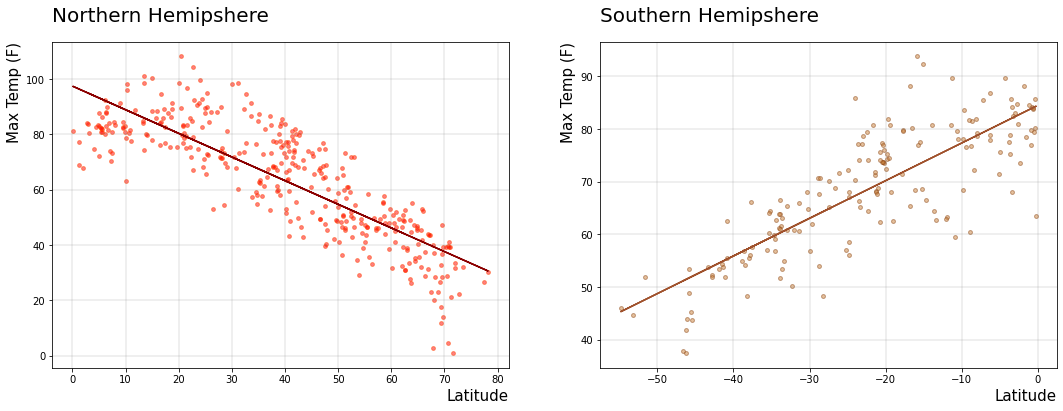

Regression Equation for the Northern Hemisphere: y = -0.86x +97.47
The R-value of the Northern Hemisphere set is: -0.831
-------------------------
Regression Equation for the Southern Hemisphere: y = 0.71x +84.49
The R-value of the Northern Hemisphere set is: 0.815


In [242]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,6))

# NORTHERN HEMISPHERE VARIABLES
x_north = northern["Latitude"]
y_north = northern["Max Temp (F)"]

(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(x_north, y_north)
regress_values_n = x_north * slope_n + intercept_n
line_eq_n = "y = " + str(round(slope_n,2)) + "x +" + str(round(intercept_n,2))

# SOUTHERN HEMISPHERE VARIABLES
x_south = southern["Latitude"]
y_south = southern["Max Temp (F)"]

(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(x_south, y_south)
regress_values_s = x_south * slope_s + intercept_s
line_eq_s = "y = " + str(round(slope_s,2)) + "x +" + str(round(intercept_s,2))


# NORTHERN HEMISPHERE PLOT
ax1.scatter(x_north, y_north, marker = "o", \
             facecolors = "red", edgecolors = "orangered", s = 15, alpha = 0.5)
ax1.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax1.set_ylabel("Max Temp (F)", loc = "top", fontsize = 15)
ax1.set_title("Northern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax1.grid(color = "grey", linewidth = 0.25)
ax1.plot(x_north, regress_values_n, "darkred")

# SOUTHERN HEMISPHERE PLOT
ax2.scatter(x_south, y_south, marker = "o", \
             facecolors = "peru", edgecolors = "saddlebrown", s = 15, alpha = 0.5)
ax2.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax2.set_ylabel("Max Temp (F)", loc = "top", fontsize = 15)
ax2.set_title("Southern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax2.grid(color = "grey", linewidth = 0.25)
ax2.annotate(line_eq_s, (25,5), fontsize=20,color="red")
ax2.plot(x_south, regress_values_s, "sienna")

plt.savefig("Images/MaxTemp_NorthSouth.png")

plt.show()
print(f"Regression Equation for the Northern Hemisphere: {line_eq_n}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_n.round(3)}")
print("-"*25)
print(f"Regression Equation for the Southern Hemisphere: {line_eq_s}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_s.round(3)}")

####  Humidity (%) vs. Latitude Linear Regression for Northern and Southern Hemispheres

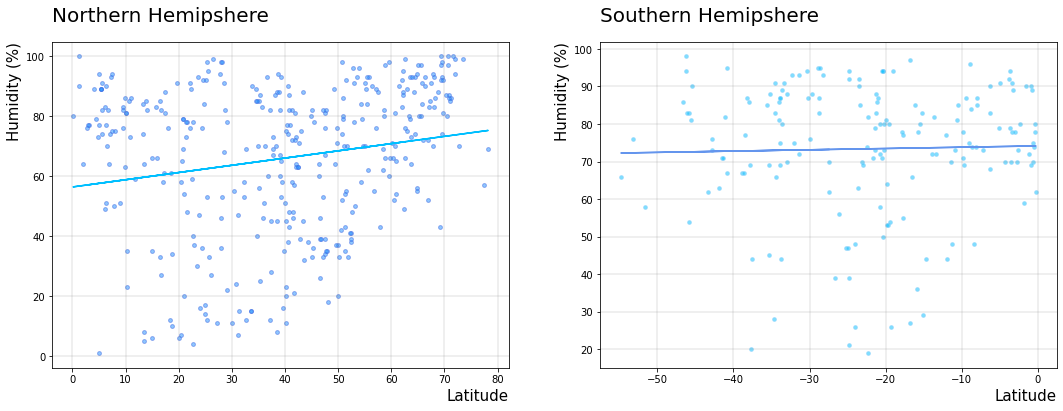

Regression Equation for the Northern Hemisphere: y = 0.24x +56.42
The R-value of the Northern Hemisphere set is: 0.195
-------------------------
Regression Equation for the Southern Hemisphere: y = 0.03x +74.17
The R-value of the Northern Hemisphere set is: 0.027


In [243]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,6))

# NORTHERN HEMISPHERE VARIABLES
x_north = northern["Latitude"]
y_north = northern["Humidity (%)"]

(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(x_north, y_north)
regress_values_n = x_north * slope_n + intercept_n
line_eq_n = "y = " + str(round(slope_n,2)) + "x +" + str(round(intercept_n,2))

# SOUTHERN HEMISPHERE VARIABLES
x_south = southern["Latitude"]
y_south = southern["Humidity (%)"]

(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(x_south, y_south)
regress_values_s = x_south * slope_s + intercept_s
line_eq_s = "y = " + str(round(slope_s,2)) + "x +" + str(round(intercept_s,2))

# NORTHERN HEMISPHERE PLOT
ax1.scatter(x_north, y_north, marker = "o", \
             facecolors = "dodgerblue", edgecolors = "royalblue", s = 15, alpha = 0.5)
ax1.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax1.set_ylabel("Humidity (%)", loc = "top", fontsize = 15)
ax1.set_title("Northern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax1.grid(color = "grey", linewidth = 0.25)
ax1.plot(x_north, regress_values_n, "deepskyblue")

# SOUTHERN HEMISPHERE PLOT
ax2.scatter(x_south, y_south, marker = "o", \
             facecolors = "deepskyblue", edgecolors = "lightskyblue", s = 15, alpha = 0.5)
ax2.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax2.set_ylabel("Humidity (%)", loc = "top", fontsize = 15)
ax2.set_title("Southern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax2.grid(color = "grey", linewidth = 0.25)
ax2.plot(x_south, regress_values_s, "cornflowerblue")

plt.savefig("Images/Humidity_NorthSouth.png")

plt.show()
print(f"Regression Equation for the Northern Hemisphere: {line_eq_n}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_n.round(3)}")
print("-"*25)
print(f"Regression Equation for the Southern Hemisphere: {line_eq_s}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_s.round(3)}")

#### Cloudiness (%) vs. Latitude Linear Regression for Northern and Southern Hemispheres

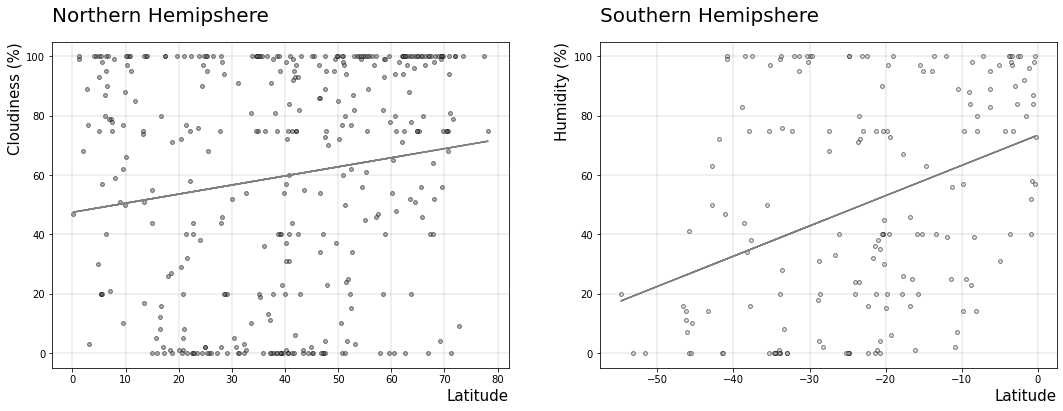

Regression Equation for the Northern Hemisphere: y = 0.31x +47.45
The R-value of the Northern Hemisphere set is: 0.16
-------------------------
Regression Equation for the Southern Hemisphere: y = 1.02x +73.45
The R-value of the Northern Hemisphere set is: 0.375


In [244]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,6))

# NORTHERN HEMISPHERE VARIABLES
x_north = northern["Latitude"]
y_north = northern["Cloudiness (%)"]

(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(x_north, y_north)
regress_values_n = x_north * slope_n + intercept_n
line_eq_n = "y = " + str(round(slope_n,2)) + "x +" + str(round(intercept_n,2))

# SOUTHERN HEMISPHERE VARIABLES
x_south = southern["Latitude"]
y_south = southern["Cloudiness (%)"]

(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(x_south, y_south)
regress_values_s = x_south * slope_s + intercept_s
line_eq_s = "y = " + str(round(slope_s,2)) + "x +" + str(round(intercept_s,2))

# NORTHERN HEMISPHERE PLOT
ax1.scatter(x_north, y_north, marker = "o", \
             facecolors = "dimgray", edgecolors = "black", s = 15, alpha = 0.5)
ax1.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax1.set_ylabel("Cloudiness (%)", loc = "top", fontsize = 15)
ax1.set_title("Northern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax1.grid(color = "grey", linewidth = 0.25)
ax1.plot(x_north, regress_values_n, "grey")

# SOUTHERN HEMISPHERE PLOT
ax2.scatter(x_south, y_south, marker = "o", \
             facecolors = "silver", edgecolors = "black", s = 15, alpha = 0.5)
ax2.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax2.set_ylabel("Humidity (%)", loc = "top", fontsize = 15)
ax2.set_title("Southern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax2.grid(color = "grey", linewidth = 0.25)
ax2.plot(x_south, regress_values_s, "grey")

plt.savefig("Images/Clouds_NorthSouth.png")

plt.show()
print(f"Regression Equation for the Northern Hemisphere: {line_eq_n}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_n.round(3)}")
print("-"*25)
print(f"Regression Equation for the Southern Hemisphere: {line_eq_s}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_s.round(3)}")

####  Wind Speed (mph) vs. Latitude Linear Regression for Northern and Southern Hemispheres

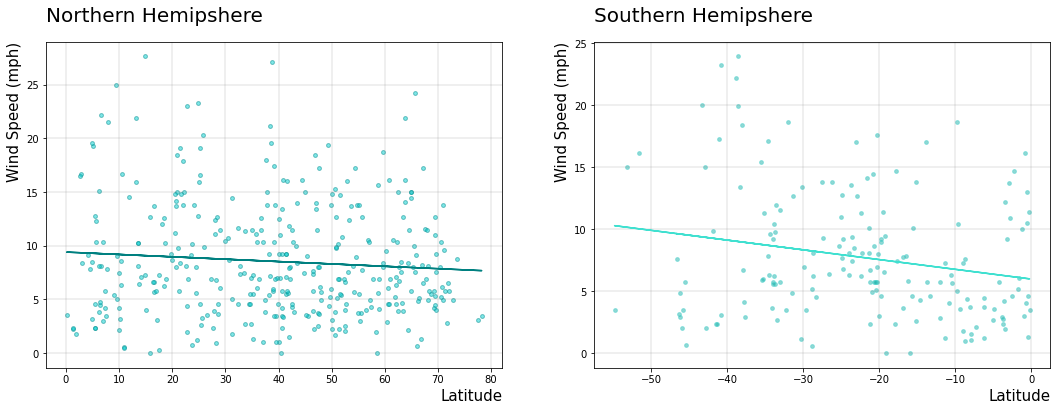

Regression Equation for the Northern Hemisphere: y = -0.02x +9.4
The R-value of the Northern Hemisphere set is: -0.084
-------------------------
Regression Equation for the Southern Hemisphere: y = -0.08x +5.96
The R-value of the Northern Hemisphere set is: -0.211


In [245]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,6))

# NORTHERN HEMISPHERE VARIABLES
x_north = northern["Latitude"]
y_north = northern["Wind Speed (mph)"]

(slope_n, intercept_n, rvalue_n, pvalue_n, stderr_n) = stats.linregress(x_north, y_north)
regress_values_n = x_north * slope_n + intercept_n
line_eq_n = "y = " + str(round(slope_n,2)) + "x +" + str(round(intercept_n,2))

# SOUTHERN HEMISPHERE VARIABLES
x_south = southern["Latitude"]
y_south = southern["Wind Speed (mph)"]

(slope_s, intercept_s, rvalue_s, pvalue_s, stderr_s) = stats.linregress(x_south, y_south)
regress_values_s = x_south * slope_s + intercept_s
line_eq_s = "y = " + str(round(slope_s,2)) + "x +" + str(round(intercept_s,2))

# NORTHERN HEMISPHERE PLOT
ax1.scatter(x_north, y_north, marker = "o", \
             facecolors = "darkturquoise", edgecolors = "darkcyan", s = 15, alpha = 0.5)
ax1.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax1.set_ylabel("Wind Speed (mph)", loc = "top", fontsize = 15)
ax1.set_title("Northern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax1.grid(color = "grey", linewidth = 0.25)
ax1.plot(x_north, regress_values_n, "teal")

# SOUTHERN HEMISPHERE PLOT
ax2.scatter(x_south, y_south, marker = "o", \
             facecolors = "lightseagreen", edgecolors = "mediumturquoise", s = 15, alpha = 0.5)
ax2.set_xlabel("Latitude", loc = "right", fontsize = 15)
ax2.set_ylabel("Wind Speed (mph)", loc = "top", fontsize = 15)
ax2.set_title("Southern Hemipshere", loc = "left", pad = 20, fontsize = 20)
ax2.grid(color = "grey", linewidth = 0.25)
ax2.plot(x_south, regress_values_s, "turquoise")

plt.savefig("Images/Wind_NorthSouth.png")

plt.show()
print(f"Regression Equation for the Northern Hemisphere: {line_eq_n}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_n.round(3)}")
print("-"*25)
print(f"Regression Equation for the Southern Hemisphere: {line_eq_s}")
print(f"The R-value of the Northern Hemisphere set is: {rvalue_s.round(3)}")